In [139]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [140]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

In [141]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [144]:
df_train = df_train.drop('Cabin', axis=1)
df_train = df_train.dropna(axis=0)

In [145]:
df_train.shape

(712, 11)

In [146]:
df_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df_train[df_columns]
y = df_train['Survived']

<Axes: >

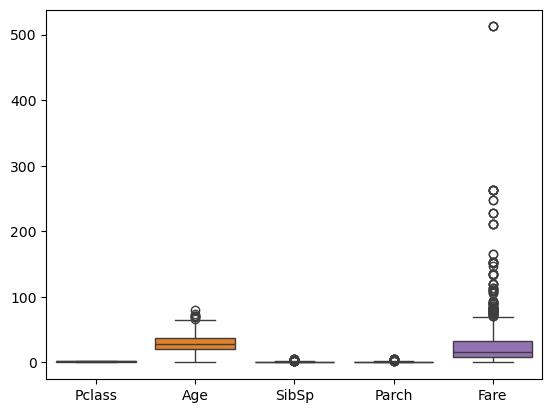

In [147]:
import seaborn as sns

sns.boxplot(X)

In [148]:
# sns.pairplot(X)

In [149]:
X[X['Fare'] > 300]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,female,35.0,0,0,512.3292,C
679,1,male,36.0,0,1,512.3292,C
737,1,male,35.0,0,0,512.3292,C


<Axes: >

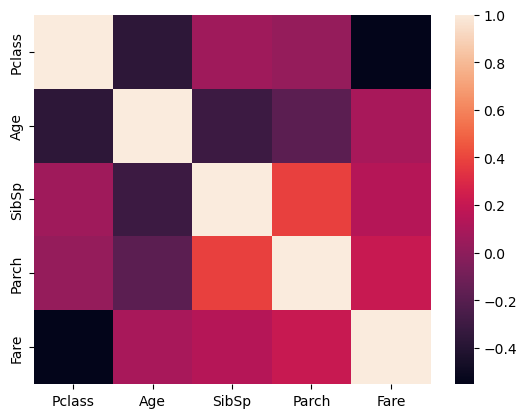

In [150]:
sns.heatmap(X.corr(numeric_only=True))

In [151]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(X[['Sex', 'Embarked']])
encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Sex', 'Embarked']), index=X.index)
X_encoded = pd.concat([X.drop(['Sex', 'Embarked'], axis=1), encoded], axis=1)

In [152]:
X_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [154]:
from sklearn.tree import DecisionTreeClassifier

tree_cls = DecisionTreeClassifier()

In [155]:
tree_cls.fit(X_train, y_train)

DecisionTreeClassifier()

<Axes: xlabel='Survived', ylabel='Count'>

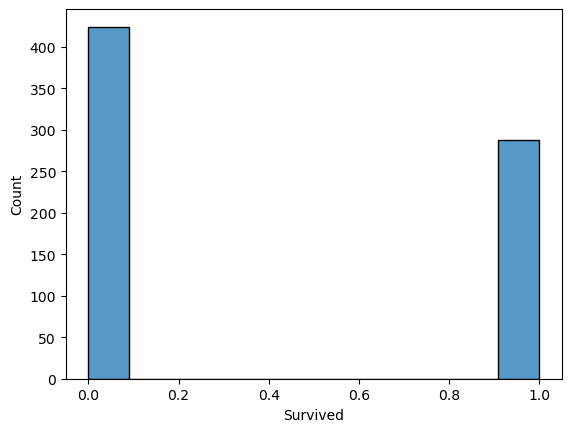

In [156]:
sns.histplot(y)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        85
           1       0.62      0.69      0.65        58

    accuracy                           0.70       143
   macro avg       0.69      0.70      0.69       143
weighted avg       0.71      0.70      0.70       143



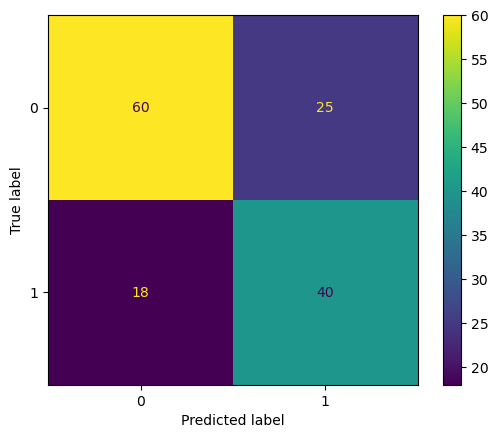

In [157]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def report(clf, X_test, y_test):
    preds = clf.predict(X_test)
    print(classification_report(y_test, preds))
    cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, preds))
    cmd.plot()
    plt.show()

report(tree_cls, X_test, y_test)

In [158]:
from sklearn.model_selection import GridSearchCV

tree_clf = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 10],
    'min_samples_split': [2, 3, 5, 7],
    'max_leaf_nodes': [5, 10, 15],
    'max_features': ['log2', 'sqrt']
}

grid = GridSearchCV(
    tree_clf,
    params,
    n_jobs=-1
)

grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'max_features': ['log2', 'sqrt'],
                         'max_leaf_nodes': [5, 10, 15],
                         'min_samples_split': [2, 3, 5, 7]})

In [159]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 15,
 'min_samples_split': 3}

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        85
           1       0.70      0.69      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.75      0.76      0.75       143



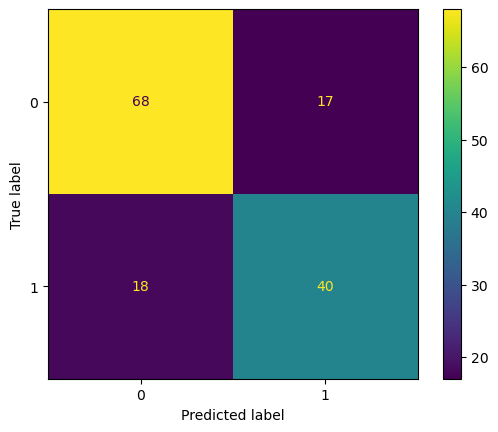

In [160]:
report(grid.best_estimator_, X_test, y_test)

In [161]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [162]:
X_predict = df_test[df_columns]

encoded = encoder.transform(X_predict[['Sex', 'Embarked']])
encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Sex', 'Embarked']), index=X_predict.index)
X_predict_encoded = pd.concat([X_predict.drop(['Sex', 'Embarked'], axis=1), encoded], axis=1)

In [163]:
grid.predict(X_predict_encoded)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [164]:
result = pd.concat([df_test, pd.DataFrame(grid.predict(X_predict_encoded), columns=['Survived'], index=df_test.index)], axis=1)

In [168]:
result[['PassengerId', 'Survived']].set_index('PassengerId').to_csv('gender_submission.csv')

In [166]:
result.shape

(418, 12)